In [1]:
import warnings
import pickle
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
import seaborn as sns
import networkx as nx
import torch
import os
import dgl
from utils.experiment_logging import get_results, get_config
import ray
import copy
from torch_geometric.utils.convert import from_networkx, to_networkx
from data_utils import  make_dataset_ready_to_save
warnings.filterwarnings("ignore")
from evaluation.mol_structure import list_of_smiles_to_nx_graphs,list_of_nx_graphs_to_smiles
from evaluation.mol_structure import draw_one_mol, draw_graphs
#import utils.graph_generators as gen
import torch
import networkx as nx
import os 
import sys
import json
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
import rdkit
import numpy as np
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess,get_graph_data, get_generated_graph_data

# Import graphs 


In [3]:
def draw_graphs(graphs, node_color='true_label', edge_color='edge_true_label', n_graphs_per_line=10, size=3):
    unique_node_labels = list(sorted(set(str(graph.nodes[u].get(node_color,0)) for graph in graphs for u in graph.nodes())))
    node_labels_color_map = {unique_node_label: i/len(unique_node_labels) for i,unique_node_label in enumerate(unique_node_labels)}
    unique_edge_labels = list(sorted(set(str(graph.edges[u,v].get(edge_color,0)) for graph in graphs for u,v in graph.edges())))
    edge_labels_color_map = {unique_edge_label: i/len(unique_edge_labels) for i,unique_edge_label in enumerate(unique_edge_labels)}
    n = len(graphs)
    n_lines = np.ceil(n / n_graphs_per_line).astype(int)
    fig, axs = plt.subplots(n_lines, n_graphs_per_line, figsize=(size*n_graphs_per_line,size*n_lines))
  
    for t,graph in enumerate(graphs):
        col = t % n_graphs_per_line
        row = t // n_graphs_per_line
        if n_lines==1: 
            ax = axs[col]
        else: 
            ax = axs[row,col]
        pos = nx.kamada_kawai_layout(graph)
        node_colors = [node_labels_color_map[str(graph.nodes[u].get(node_color,0))] for u in graph.nodes()]
        nx.draw_networkx_nodes(graph, pos, node_size=80, node_color=node_colors, cmap='Set3', linewidths=1, edgecolors='k', ax=ax)
        edge_colors = [edge_labels_color_map[str(graph.edges[u,v].get(edge_color,0))] for u,v in graph.edges()]
        nx.draw_networkx_edges(graph, pos, width=1, style='-', edge_color=edge_colors, edge_cmap=plt.get_cmap('tab20'), ax=ax)    
        for t in range(n_graphs_per_line):
            try: axs[t].set_axis_off()
            except: axs[row,t].set_axis_off()
    #plt.axis('off')
    plt.show()

In [4]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_50']
device=torch.device('cpu')

#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn','swingnn']

for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            
                print(dataset_name+split, generator)
                train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
                reference_graphs,targets=train1_graphs , train1_targets,
               
            


ames_50 hiervae
bbb_martins_50 hiervae
cyp1a2_veith_50 hiervae


KeyboardInterrupt: 

In [5]:
synthetic=['synthetic_1', 'synthetic_2']
splits=['_50']
device=torch.device('cpu')


for dataset_name in synthetic:
    for split in splits:
        
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_graph_data(dataset_name+split,path='data/graphs/generations')
            reference_graphs,targets=train1_graphs , train1_targets
                
            


synthetic_1_50
synthetic_2_50


In [ ]:
reference_graphs[0].nodes(data=True)

NodeDataView({0: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 1: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 0], 'label_name': 'C'}, 2: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 0, 0], 'label_name': 'C'}, 3: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 0, 0], 'label_name': 'C'}, 4: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 5: {'label': 6, 'attr': [5, 0, 4, 5, 0, 0, 2, 0, 1], 'label_name': 'C'}, 6: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 0], 'label_name': 'C'}, 7: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 8: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 0, 1], 'label_name': 'C'}, 9: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 10: {'label': 7, 'attr': [6, 0, 3, 5, 1, 0, 1, 0, 1], 'label_name': 'N'}, 11: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 0, 1], 'label_name': 'C'}, 12: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 13: {'label': 7, 'attr': [6, 0, 3,

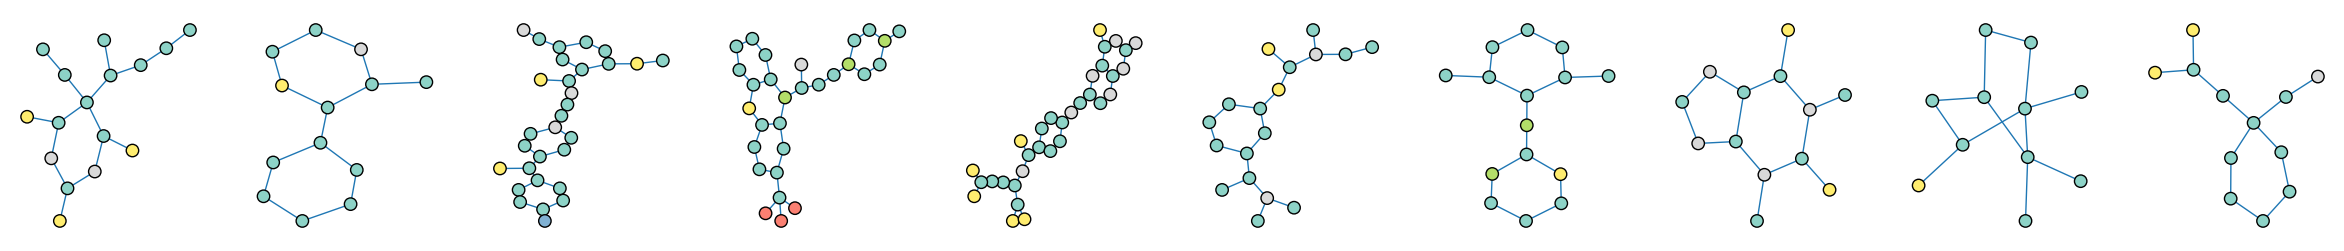

In [ ]:
draw_graphs(reference_graphs[:10], node_color='label_name', edge_color='label_name', n_graphs_per_line=10, size=3)

C:\Users\cosmi\AppData\Local\Temp\ipykernel_35992\3135333039.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, width=1, style='-', edge_color=edge_colors, edge_cmap=plt.get_cmap('tab20'), ax=ax)


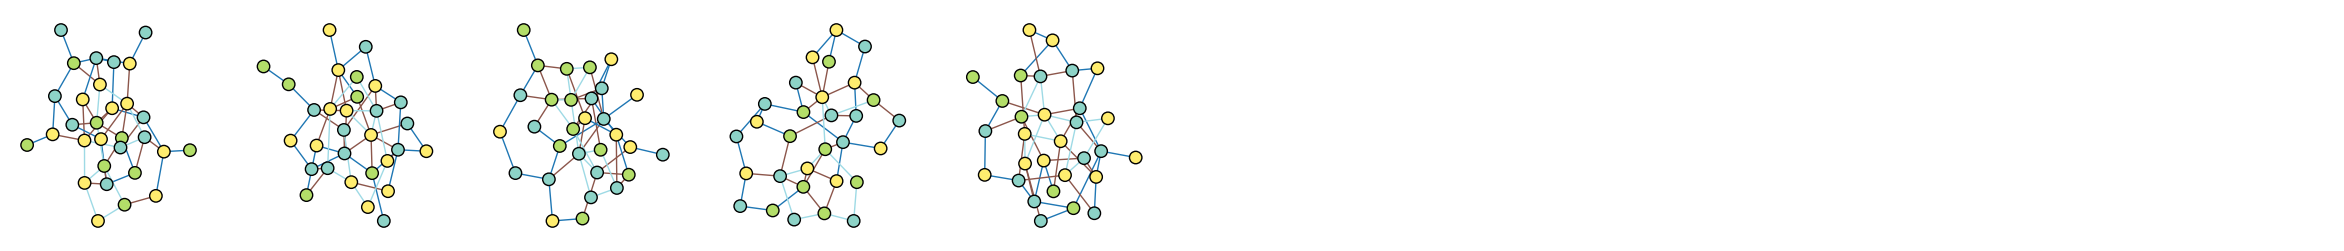

In [ ]:
draw_graphs(nx_graphs[:5])

# Permuters 



## Rewire permuter


In [4]:
reference_graphs[0].edges(data=True)

NameError: name 'reference_graphs' is not defined

In [1]:
import random
def permute_graphs(reference_graphs,iter,step_size=0.01,targets=None):
    try:
     reference_graphs=[dgl.from_networkx(g.to_directed(), node_attrs=['label','true_label'], edge_attrs=['label','true_label']) for g in reference_graphs]
     if targets != None:
        for graph, label in zip(reference_graphs,targets):
                graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))
    except:reference_graphs=[dgl.from_networkx(g.to_directed(),) for g in reference_graphs] 
    
    
    probability = iter * step_size
    if probability > 1.0:
            return False
    permuted_set = [copy.deepcopy(g)   for g in reference_graphs]
    for g in permuted_set:
           
            __rewire_edges(g, probability)

    
    
    return permuted_set

def __rewire_edges( g, probability):
        selected_edges = __get_edges_to_rewire(g, probability)
        if len(selected_edges) == 0:
                return

        to_keep, to_disconnect, to_connect = __get_nodes(g, selected_edges)

        __delete_edges(g, to_keep, to_disconnect, to_connect)

        __add_edges(g, to_keep, to_connect)

def __get_edges_to_rewire( g, probability):
        num_edges = g.num_edges()# This double counts edges in undirected
        selected_edges = np.random.binomial(
                1, probability, size=num_edges // 2).nonzero()[0]
        return selected_edges

def __get_nodes( g, selected_edges):
        to_keep = np.random.binomial(
                1, 0.5, size=len(selected_edges))
        to_disconnect = np.logical_not(to_keep).astype(int)

        edges = torch.tril(
                g.adj().to_dense()).nonzero().transpose(1, 0).numpy()
        to_disconnect = edges[to_disconnect, selected_edges]
        to_keep = edges[to_keep, selected_edges]

        to_connect = __get_nodes_to_connect(g, to_keep, to_disconnect)

        assert g.has_edges_between(to_keep, to_disconnect).all()
        assert g.has_edges_between(to_disconnect, to_keep).all()

        return to_keep, to_disconnect, to_connect

def __get_nodes_to_connect( g, to_keep, to_disconnect):
        to_connect = np.random.choice(
                range(g.number_of_nodes()), size=len(to_keep))

        return __resample_new_nodes(g, to_keep, to_disconnect, to_connect)

def __resample_new_nodes( g, to_keep, to_disconnect, to_connect):
        """Resample new nodes if we sample the node we are disconnecting or if it
        results in a self-loop."""
        dataset='non_ego'

        for ix, (kept_node, old_node, new_node) in enumerate(zip(to_keep, to_disconnect, to_connect)):
                if dataset != 'ego':
                        while new_node == kept_node or new_node == old_node:
                                new_node = np.random.choice(range(g.number_of_nodes()))
                else:
                        while new_node == old_node:
                         new_node = np.random.choice(range(g.number_of_nodes()))
                to_connect[ix] = new_node

        return to_connect

def __delete_edges( g, to_keep, to_disconnect, to_connect):
        old_num_edges = g.number_of_edges()
        dataset='non_ego'

        eids = torch.cat(
                [g.edge_ids(to_keep, to_disconnect),
                g.edge_ids(to_disconnect, to_keep)])
        if 'attr' in g.edata:
                g.deleted_edge_attr = torch.clone(g.edata['attr'][eids])
        else:
                g.deleted_edge_attr = None
        g.remove_edges(eids)
        g._reset_cached_info()

        if dataset != 'ego':
                assert g.number_of_edges() == (old_num_edges - len(eids)), f'{g.number_of_edges()}, {old_num_edges}, {len(eids)}'
        assert not g.has_edges_between(to_keep, to_disconnect).all()
        assert not g.has_edges_between(to_disconnect, to_keep).all()

def __add_edges( g, to_keep, to_connect):
        # old_num_edges = g.number_of_edges()

        g.add_edges(to_keep, to_connect)
        g.add_edges(to_connect, to_keep)
        g._reset_cached_info()

        eids = torch.cat(
                [g.edge_ids(to_keep, to_connect),
                g.edge_ids(to_connect, to_keep)])

        if g.deleted_edge_attr is not None:
                g.edata['attr'][-len(eids): ] = g.deleted_edge_attr

        # if dataset != 'ego':
        #     assert g.number_of_edges() == old_num_edges, f'{old_num_edges}, {g.number_of_edges()}'


In [ ]:
import copy
r=[5, 10, 25, 33,40, 50, 66, 75,90, 100]
ref=reference_graphs[:9]
draw_graphs( [i for i in ref ])
for  iter in r:
    permuted_graphs=permute_graphs(ref,iter=iter)
    print(f'Iteration:{iter}')
    permuted_set=[nx.Graph(dgl.to_networkx(i.cpu(),node_attrs=['label','true_label'], edge_attrs=['label','true_label'])) for i in permuted_graphs]
    draw_graphs( [nx.Graph(dgl.to_networkx(i,node_attrs=['label','true_label'], edge_attrs=['label','true_label'])) for i in permuted_graphs ])
    plt.show()

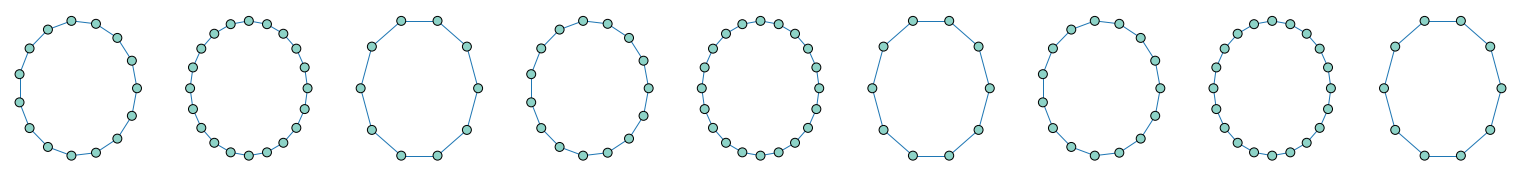

Iteration:5


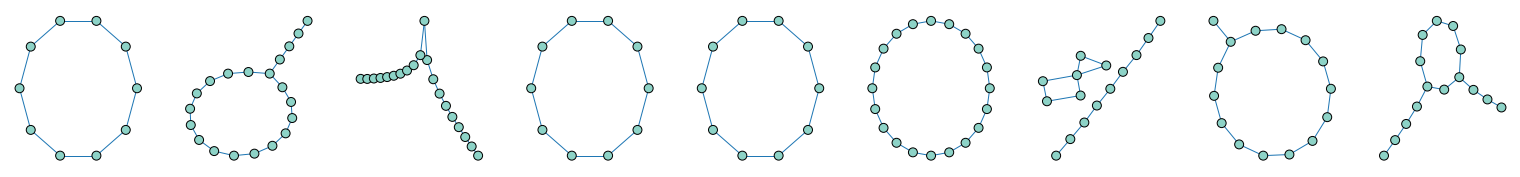

Iteration:10
Iteration:25


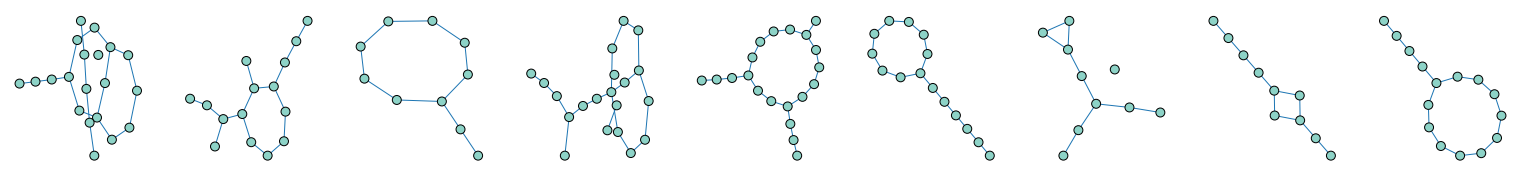

Iteration:33
Iteration:40
Iteration:50


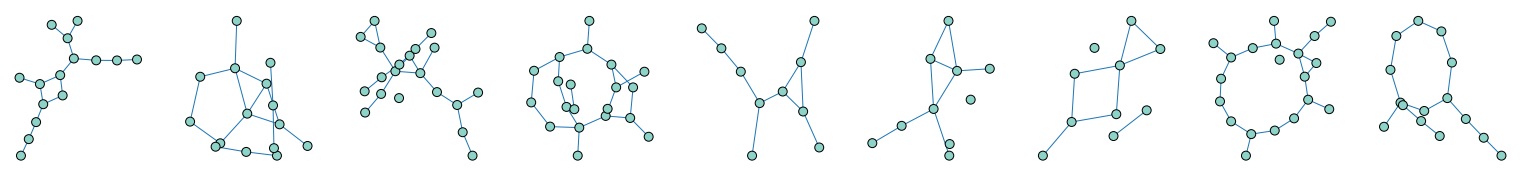

Iteration:66
Iteration:75


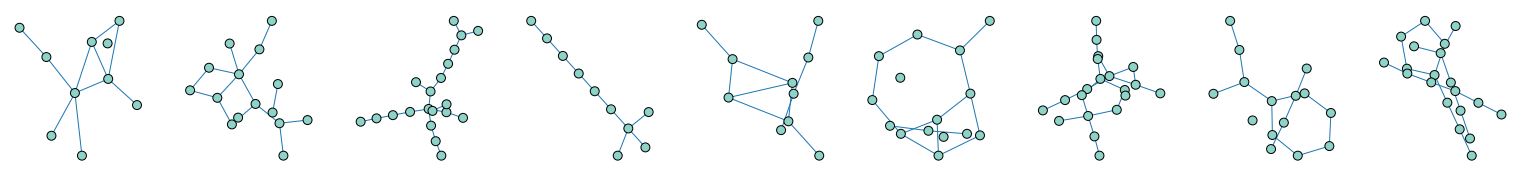

Iteration:90
Iteration:100


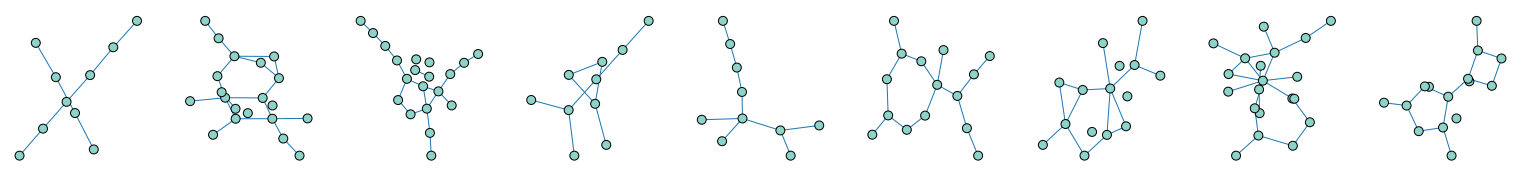

In [ ]:
import copy
r=[5, 10, 25, 33,40, 50, 66, 75,90, 100]
ref=reference_graphs4[:9]
draw_graphs( [i for i in ref ])
for  iter in r:
    permuted_graphs=permute_graphs(ref,iter=iter)
    print(f'Iteration:{iter}')
    if iter in [5,  25, 50, 75, 100]:
        permuted_set=[nx.Graph(dgl.to_networkx(i.cpu())) for i in permuted_graphs]
        draw_graphs( [nx.Graph(dgl.to_networkx(i)) for i in permuted_graphs ])
        plt.show()


In [ ]:
r=[0,5, 10, 25, 33,40, 50, 66, 75,90, 100]
dataset='synthetic_2_50'
permute_data_drc='rewired/train1/'+dataset
for  iter in r:
    permuted_graphs=permute_graphs(reference_graphs,iter=iter,targets=targets)
    print(permuted_graphs)
    permuted_set=[nx.Graph(dgl.to_networkx(i.cpu(),node_attrs=['label','true_label','target'], edge_attrs=['label','true_label'])) for i in permuted_graphs]
    with open(permute_data_drc + f'/{dataset}_rewired_with_{str(iter).replace(".x","")}.pkl', 'wb+') as f:
            pickle.dump(permuted_set, f)

[Graph(num_nodes=30, num_edges=98,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int32), 'true_label': Scheme(shape=(), dtype=torch.int32), 'target': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'true_label': Scheme(shape=(), dtype=torch.int64)}), Graph(num_nodes=30, num_edges=94,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int32), 'true_label': Scheme(shape=(), dtype=torch.int32), 'target': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'true_label': Scheme(shape=(), dtype=torch.int64)}), Graph(num_nodes=30, num_edges=102,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int32), 'true_label': Scheme(shape=(), dtype=torch.int32), 'target': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'true_label': Scheme(shape=(), dtype=torch.int64)}), Graph(num_nodes=30, num_edges=92,
      n

In [ ]:
iter = 1
permute_data_drc='permuted'
while 1:
    # Returns false if the experiment is complete
    try:
        print(iter)
        permuted_set = permute_graphs(reference_graphs4, iter)
        if permuted_set == False:
           break
    except: 'Error when permuting!'
    """
    # saving_permuted_sets.append(make_dataset_ready_to_save(permuted_set))
    with open(permute_data_drc + f'/permuted_set_{iter}', 'ab+') as f:
        pickle.dump(make_dataset_ready_to_save(permuted_set), f)
    """

    iter += 1




In [ ]:
reference_graphs2[1]

## Mixing with random graphs 


In [14]:
import math
from random import shuffle
def make_er_graphs(reference_set,dataset='synthetic_1_50_train1_neg'):
    """Generate ER graphs to resemble the given dataset.
    Parameters
    ----------
    args : Argparse dict
        Command line arguments parsed by argparse
    reference_set : list of DGL graphs
        The dataset used as reference for generating ER graphs.
    Returns
    -------
    list of DGL graphs
        List of DGL ER graphs that resemble given dataset. For ZINC,
        node/edge features are randomly selected according to their
        pmfs.
    """
    # Compute sparsity of each graph
    avg_p = [
        g.number_of_edges() / (g.number_of_nodes() ** 2)
        for g in reference_set]

    # Generate ER graphs
    generated_graphs = [
        nx.erdos_renyi_graph(
            g.number_of_nodes(), p, seed=np.random.choice(100))
        for g, p in zip(reference_set, avg_p)]

    generated_graphs = [dgl.DGLGraph(g) for g in generated_graphs]
    generated_graphs = [g for g in generated_graphs]

    #if dataset in ['zinc' ,'synthetic_1_50_train1_pos','synthetic_2_50_train1_pos','synthetic_1_50_train1_neg','synthetic_2_50_train1_neg']:  # Randomly assign node/edge labels
    generated_graphs=randomly_assign_labels(generated_graphs, reference_set)

    return generated_graphs


def randomly_assign_labels(fake_graphs, reference_set):
        """Assign random node/edge labels to ER graphs.
        Parameters
        ----------
        fake_graphs : list of DGL graphs
            ER graphs generated by make_er_graphs that resemble specified dataset.
        reference_set : list of DGL graphs
            The dataset used as reference for generating ER graphs and
            determing node/edge label pmfs.
        Returns
        -------
        Nothing, but modifies fake_graphs in place to add attributes.
        """
        # Obtain pmf for node/edge features to sample from.
        # One-hot encoded so mean gives pmf.
        bg = dgl.batch(reference_set)  # Batch all graphs into single graph.
        node_pmf = bg.ndata['label']#.mean(axis=0).cpu().numpy()
        node_attr_pmf=bg.ndata['attr']
        edge_pmf = bg.edata['label']#.mean(axis=0).cpu().numpy()
        edge_attr_pmf = bg.edata['attr']#.mean(axis=0).cpu().numpy()

        num_node_attrs = node_pmf.shape[0]
        num_edge_attrs = edge_pmf.shape[0]

        for g,h in zip(fake_graphs,reference_set):
            # Sample node attrs. for each node in this graph
            fake_node_types = np.random.choice(node_pmf, size=g.number_of_nodes())
            probs=[1/len(node_attr_pmf) ]  * len(node_attr_pmf)
            indicies = np.random.choice(len(node_attr_pmf), g.number_of_nodes(), p=probs)
            fake_node_attr=node_attr_pmf[indicies]
            # Convert to one-hot encoding
            one_hot = torch.eye(num_node_attrs).to(g.device)
            g.ndata['attr'] =  torch.tensor(fake_node_attr)#one_hot[fake_node_types]  # Add features to graph
            g.ndata['label'] =torch.tensor(fake_node_types) #one_hot[fake_node_types]  # Add features to graph
            g.ndata['target'] =h.ndata['target'] 
            # Sample edge attrs. for each node in this graph
            fake_edge_types =  np.random.choice(edge_pmf, size=g.number_of_edges())
            probs=[1/len(edge_attr_pmf[:100]) ]  * len(edge_attr_pmf[:100])
            indicies = np.random.choice(len(edge_attr_pmf[:100]), g.number_of_edges(), p=probs)
            fake_edge_attr=edge_attr_pmf[:100][indicies]
            g.edata['attr'] =torch.tensor(fake_edge_attr) #one_hot[fake_edge_types]  # Add features to graph
            g.edata['label'] = torch.tensor(fake_edge_types)#one_hot[fake_edge_types]  # Add features to graph
        return fake_graphs


def get_fake_graphs(reference_set):
    fake_graphs = make_er_graphs(reference_set)
    return fake_graphs 
def experiment_complete(permuted_set):
     return get_ratio(permuted_set) > 1

def get_ratio(permuted_set):
    num_graphs = len(permuted_set)
    fake_graphs = [g for g in permuted_set if g.is_fake]
    return len(fake_graphs) / num_graphs


def permute_graphs(permuted_set,num_fake_graphs_list,step_size=0.01):
        # Compute the number of graphs added/removed at each step
        lists_of_permuted_sets=[]

        
        #num_graphs = len(permuted_set)
        #step_size = math.ceil(num_graphs * step_size)
        fake_graphs= get_fake_graphs(permuted_set)
        
        # Label graphs so we know how many are real/fake at any point
        for fake in (fake_graphs):
            fake.is_fake = True


        for num_fake_graphs in num_fake_graphs_list:
            print('1')
            permuted_set1=permuted_set.copy()
            del permuted_set1[:num_fake_graphs]
            permuted_set1 += fake_graphs[:num_fake_graphs]
            
            lists_of_permuted_sets.append(permuted_set1)
            
            
        
        return lists_of_permuted_sets


In [15]:
def get_ratio(reference_graphs):
    num_graphs = len(reference_graphs)
    fake_graphs = [g for g in reference_graphs if g.is_fake]
    return len(fake_graphs) / num_graphs

In [16]:
def add_er_graphs(reference_graphs,desired_iterations,targets=None):
   
    iter = 1
    permute_data_drc='permuted'
    try:
      reference_graphs1=[dgl.from_networkx(g.to_directed(),node_attrs=['attr','label'], edge_attrs=['attr','label']) for g in reference_graphs]
      if targets != None:
        for graph, label in zip(reference_graphs1,targets):
                    graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))
        
    except: reference_graphs1=[dgl.from_networkx(g) for g in reference_graphs]
   

   
    for real in (reference_graphs1):
                real.is_fake = False

    permuted_set = [copy.deepcopy(g)   for g in reference_graphs1]
    
    permuted_set = permute_graphs(permuted_set, desired_iterations)
    #n_fake=get_ratio(permuted_set)
    
    #print(iter,n_fake)
    #print(len(permuted_set))

    return permuted_set
    
    
    """
    # saving_permuted_sets.append(make_dataset_ready_to_save(permuted_set))
    with open(permute_data_drc + f'/permuted_set_{iter}', 'ab+') as f:
        pickle.dump(make_dataset_ready_to_save(permuted_set), f)
    """

    
    
    #print(iter)
    


In [ ]:
from 

In [6]:
current_smiles_datasets=['bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
current_smiles_datasets=[ 'cyp1a2_veith']

splits=['_50']
device=torch.device('cpu')

for dataset_name in current_smiles_datasets:
        for split in splits:
            
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            reference_graphs,targets=train1_graphs , train1_targets
            c = list(zip(reference_graphs,targets))
            shuffle(c)
            reference_graphs,targets=zip(*c)
            r=[0,0.05, 0.10, 0.15, 0.25, 0.33, 0.45, 0.50, 0.65, 0.70,0.75,0.85,0.90,0.95, 1]
            desired_iterations=[int(r* (len(reference_graphs))) for r in  r]
            percent=dict(map(lambda i,j : (i,j) , desired_iterations,r))
            #dataset='synthetic_2_50_train1_neg'
            permute_data_drc='corrupted/train1/'
    
            permuted_set_lists=add_er_graphs(reference_graphs, desired_iterations,targets=targets)
        
            for  iter,permuted_set  in zip(desired_iterations, permuted_set_lists):
                permuted_set=[nx.Graph(dgl.to_networkx(i,node_attrs=['label','attr','target'], edge_attrs=['label','attr'])) for i in permuted_set]
                with open(permute_data_drc + f'/{dataset_name+split}/{dataset_name+split}_corrupted_with_{str(int(percent[iter]*100)).replace(".x","")}.pkl', 'wb+') as f:
                                        pickle.dump(permuted_set, f)
            #except:continue

cyp1a2_veith_50


NameError: name 'shuffle' is not defined

In [20]:
reference_graphs[0].nodes(data=True)

NodeDataView({0: {'label': 6, 'attr': [5, 0, 3, 5, 2, 0, 1, 0, 0], 'label_name': 'C'}, 1: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 0, 0], 'label_name': 'C'}, 2: {'label': 6, 'attr': [5, 1, 4, 5, 0, 0, 2, 0, 1], 'label_name': 'C'}, 3: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 4: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 1], 'label_name': 'C'}, 5: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 0, 1], 'label_name': 'C'}, 6: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 7: {'label': 6, 'attr': [5, 1, 4, 5, 0, 0, 2, 0, 1], 'label_name': 'C'}, 8: {'label': 8, 'attr': [7, 0, 2, 5, 1, 0, 2, 0, 0], 'label_name': 'O'}, 9: {'label': 6, 'attr': [5, 1, 4, 5, 0, 0, 2, 0, 1], 'label_name': 'C'}, 10: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 11: {'label': 6, 'attr': [5, 1, 4, 5, 1, 0, 2, 0, 1], 'label_name': 'C'}, 12: {'label': 8, 'attr': [7, 0, 2, 5, 1, 0, 2, 0, 0], 'label_name': 'O'}, 13: {'label': 6, 'attr': [5, 0, 4,

In [21]:
permuted_set[0].nodes(data=True)

NodeDataView({0: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 3, 0, 2, 0, 0]), 'target': tensor(0)}, 1: {'label': tensor(7), 'attr': tensor([7, 0, 2, 5, 0, 0, 2, 0, 1]), 'target': tensor(0)}, 2: {'label': tensor(6), 'attr': tensor([7, 0, 2, 5, 0, 0, 1, 0, 0]), 'target': tensor(0)}, 3: {'label': tensor(7), 'attr': tensor([5, 0, 3, 5, 0, 0, 1, 0, 1]), 'target': tensor(0)}, 4: {'label': tensor(7), 'attr': tensor([5, 0, 3, 5, 0, 0, 1, 0, 1]), 'target': tensor(0)}, 5: {'label': tensor(8), 'attr': tensor([5, 1, 4, 5, 1, 0, 2, 0, 1]), 'target': tensor(0)}, 6: {'label': tensor(6), 'attr': tensor([5, 0, 3, 5, 0, 0, 1, 0, 1]), 'target': tensor(0)}, 7: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 2, 0, 2, 0, 1]), 'target': tensor(0)}, 8: {'label': tensor(6), 'attr': tensor([5, 0, 3, 5, 1, 0, 1, 1, 1]), 'target': tensor(0)}, 9: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 1, 0, 2, 0, 1]), 'target': tensor(0)}, 10: {'label': tensor(6), 'attr': tensor([6, 0, 3, 5, 2, 0, 1, 0, 0]), 'targe

In [27]:
import pandas as pd
test=pd.read_pickle('corrupted/train1/cyp1a2_veith_50/cyp1a2_veith_50_corrupted_with_0.pkl')

In [28]:
test[0].nodes(data=True)

NodeDataView({0: {'label': tensor(6), 'attr': tensor([5, 0, 3, 5, 2, 0, 1, 0, 0]), 'target': tensor(0)}, 1: {'label': tensor(6), 'attr': tensor([5, 0, 3, 5, 1, 0, 1, 0, 0]), 'target': tensor(0)}, 2: {'label': tensor(6), 'attr': tensor([5, 1, 4, 5, 0, 0, 2, 0, 1]), 'target': tensor(0)}, 3: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 3, 0, 2, 0, 0]), 'target': tensor(0)}, 4: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 2, 0, 2, 0, 1]), 'target': tensor(0)}, 5: {'label': tensor(6), 'attr': tensor([5, 0, 3, 5, 0, 0, 1, 0, 1]), 'target': tensor(0)}, 6: {'label': tensor(8), 'attr': tensor([7, 0, 1, 5, 0, 0, 1, 0, 0]), 'target': tensor(0)}, 7: {'label': tensor(6), 'attr': tensor([5, 1, 4, 5, 0, 0, 2, 0, 1]), 'target': tensor(0)}, 8: {'label': tensor(8), 'attr': tensor([7, 0, 2, 5, 1, 0, 2, 0, 0]), 'target': tensor(0)}, 9: {'label': tensor(6), 'attr': tensor([5, 1, 4, 5, 0, 0, 2, 0, 1]), 'target': tensor(0)}, 10: {'label': tensor(6), 'attr': tensor([5, 0, 4, 5, 3, 0, 2, 0, 0]), 'targe

In [40]:
len(train1_graphs)

4401

In [31]:
graphs=get_data('cyp1a2_veith_50')

In [37]:
graphs[0][0].nodes(data=True)

NodeDataView({0: {'label': 6, 'attr': [5, 0, 4, 5, 3, 0, 2, 0, 0], 'label_name': 'C'}, 1: {'label': 8, 'attr': [7, 0, 2, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 2: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 0, 0], 'label_name': 'C'}, 3: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 4: {'label': 7, 'attr': [6, 0, 3, 5, 0, 0, 1, 0, 1], 'label_name': 'N'}, 5: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 1], 'label_name': 'C'}, 6: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 1], 'label_name': 'C'}, 7: {'label': 6, 'attr': [5, 0, 4, 5, 0, 0, 2, 0, 1], 'label_name': 'C'}, 8: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 1], 'label_name': 'C'}, 9: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 1], 'label_name': 'C'}, 10: {'label': 7, 'attr': [6, 0, 3, 5, 0, 0, 2, 0, 1], 'label_name': 'N'}, 11: {'label': 6, 'attr': [5, 0, 4, 5, 2, 0, 2, 0, 0], 'label_name': 'C'}, 12: {'label': 6, 'attr': [5, 0, 4, 5, 1, 0, 2, 0, 0], 'label_name': 'C'}, 13: {'label': 6, 'attr': [5, 0, 4,

In [19]:
reference_graphs1=[dgl.from_networkx(g.to_directed(),node_attrs=['label','attr'], edge_attrs=['label','attr']) for g in reference_graphs]
for graph, label in zip(reference_graphs1,targets):
                graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))

bg = dgl.batch(reference_graphs1)  # Batch all graphs into single graph.
bg = dgl.batch(reference_graphs1)  # Batch all graphs into single graph.
node_pmf = bg.ndata['label']#.mean(axis=0).cpu().numpy()
node_attr_pmf=bg.ndata['attr']
edge_pmf = bg.edata['label']#.mean(axis=0).cpu().numpy()
edge_attr_pmf = bg.edata['attr']#.mean(axis=0).cpu().numpy()

num_node_attrs = node_pmf.shape[0]
num_edge_attrs = edge_pmf.shape[0]

for g, h in zip(reference_graphs1,reference_graphs1):
    # Sample node attrs. for each node in this graph
    fake_node_types = np.random.choice(node_pmf, size=g.number_of_nodes())
    probs=[1/len(node_attr_pmf) ]  * len(node_attr_pmf)
    indicies = np.random.choice(len(node_attr_pmf), g.number_of_nodes(), p=probs)
    fake_node_attr=node_attr_pmf[indicies]
    # Convert to one-hot encoding
    one_hot = torch.eye(num_node_attrs).to(g.device)
    g.ndata['attr'] =  torch.tensor(fake_node_attr)#one_hot[fake_node_types]  # Add features to graph
    g.ndata['label'] =torch.tensor(fake_node_types) #one_hot[fake_node_types]  # Add features to graph
    g.ndata['target'] =h.ndata['target'] 
    # Sample edge attrs. for each node in this graph
    fake_edge_types =  np.random.choice(edge_pmf, size=g.number_of_edges())
    probs=[1/len(edge_attr_pmf[:100]) ]  * len(edge_attr_pmf[:100])
    indicies = np.random.choice(len(edge_attr_pmf[:100]), g.number_of_edges(), p=probs)
    fake_edge_attr=edge_attr_pmf[:100][indicies]
    g.edata['attr'] =torch.tensor(fake_edge_attr) #one_hot[fake_edge_types]  # Add features to graph
    g.edata['label'] = torch.tensor(fake_edge_types)#one_hot[fake_edge_types]  # Add features to graph

In [ ]:
    probs=[1/len(edge_attr_pmf) ]  * len(edge_attr_pmf)
    indicies = np.random.choice(len(edge_attr_pmf), g.number_of_edges(), p=probs)
    fake_edge_attr=edge_attr_pmf[indicies]
    g.edata['attr'] =torch.tensor(fake_edge_attr) #one_hot[fake_edge_types]  # Add features to graph

In [13]:
edge_attr_pmf[:30]

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 2, 0],
        [1, 2, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 0, 1],
        [0, 0, 1],
        [1, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 1],
        [0, 0, 1],
        [1, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 1]])

edge_attr_pmf

In [15]:
reference_graphs1=[dgl.from_networkx(g.to_directed(),node_attrs=['label','attr'], edge_attrs=['label','attr']) for g in reference_graphs]
for graph, label in zip(reference_graphs1,targets):
                graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))
bg = dgl.batch(reference_graphs1)  # Batch all graphs into single graph.
edge_attr_pmf = bg.edata['attr']#.mean(axis=0).cpu().numpy()


In [16]:
probs=[1/len(edge_attr_pmf) ]  * len(edge_attr_pmf)

In [18]:
len(edge_attr_pmf)

236210

In [27]:
edge_attr_pmf

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 0, 1],
        [3, 0, 1],
        [3, 0, 1]])

In [29]:
indicies=np.random.choice(len(edge_attr_pmf), 1, p=probs)
edge_attr_pmf[indicies]
    

tensor([[1, 0, 1]])

In [13]:
edge_pmf

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 0, 1],
        [3, 0, 1],
        [3, 0, 1]])

In [22]:
for g,h in zip(reference_graphs1,reference_graphs1):
   

EdgeDataView([(0, 1, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (1, 2, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (2, 3, {'label': 2, 'attr': [1, 0, 1], 'edge_label': 'DOUBLE'}), (2, 4, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (4, 5, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (4, 20, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (5, 6, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (5, 7, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (7, 8, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (7, 14, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (8, 9, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (8, 13, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (9, 10, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (10, 11, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (11, 12, {'label': 1, 'attr': [3, 0, 1], 'edge_label':

In [27]:
node_pmf.shape[0]

109111

In [23]:
bg.edata['attr'][:1000]

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 1],
        ...,
        [3, 0, 1],
        [0, 0, 0],
        [0, 0, 0]])

In [15]:
train1_graphs[0].nodes(data=True)

NodeDataView({0: {'true_label': 1, 'label': 0}, 1: {'true_label': 0, 'label': 0}, 2: {'true_label': 2, 'label': 0}, 3: {'true_label': 0, 'label': 0}, 4: {'true_label': 1, 'label': 0}, 5: {'true_label': 1, 'label': 0}, 6: {'true_label': 0, 'label': 0}, 7: {'true_label': 2, 'label': 0}, 8: {'true_label': 2, 'label': 0}, 9: {'true_label': 1, 'label': 0}, 10: {'true_label': 2, 'label': 0}, 11: {'true_label': 0, 'label': 0}, 12: {'true_label': 2, 'label': 0}, 13: {'true_label': 2, 'label': 0}, 14: {'true_label': 1, 'label': 0}, 15: {'true_label': 2, 'label': 0}, 16: {'true_label': 0, 'label': 0}, 17: {'true_label': 0, 'label': 0}, 18: {'true_label': 0, 'label': 0}, 19: {'true_label': 0, 'label': 0}, 20: {'true_label': 1, 'label': 0}, 21: {'true_label': 0, 'label': 0}, 22: {'true_label': 1, 'label': 0}, 23: {'true_label': 0, 'label': 0}, 24: {'true_label': 2, 'label': 0}, 25: {'true_label': 2, 'label': 0}, 26: {'true_label': 0, 'label': 0}, 27: {'true_label': 2, 'label': 0}, 28: {'true_label

In [28]:
splits=['_50']
device=torch.device('cpu')
synthetic=['synthetic_1', 'synthetic_2']

for dataset_name in synthetic:
        for split in splits:
            
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_graph_data(dataset_name+split,path='data/graphs/generations')
            r=[0,0.05, 0.10, 0.15, 0.25, 0.33, 0.45, 0.50, 0.65, 0.70,0.75,0.85,0.90,0.95, 1]
            desired_iterations=[int(r* (len(reference_graphs))) for r in  r]
            percent=dict(map(lambda i,j : (i,j) , desired_iterations,r))
            #dataset='synthetic_2_50_train1_neg'
            permute_data_drc='corrupted/train1/'
    
            permuted_set_lists=add_er_graphs(reference_graphs, desired_iterations,targets=targets)
        
            for  iter,permuted_set  in zip(desired_iterations, permuted_set_lists):
                permuted_set=[nx.Graph(dgl.to_networkx(i,node_attrs=['label','true_label','target'], edge_attrs=['label'])) for i in permuted_set]
                with open(permute_data_drc + f'/{dataset_name+split}/{dataset_name+split}_corrupted_with_{str(int(percent[iter]*100)).replace(".x","")}.pkl', 'wb+') as f:
                                        pickle.dump(permuted_set, f)

synthetic_1_50
synthetic_2_50


## Mode   permuter



In [ ]:
ames_50

### Shared class

In [2]:
import numpy as np
import random

import networkx as nx
from sklearn.cluster import AffinityPropagation
import grakel
from grakel.kernels import WeisfeilerLehman, VertexHistogram,NeighborhoodSubgraphPairwiseDistance

class GraphClustering():
    """Performs graph clustering."""

    def get_clusters(self, dataset, dataset_name):
        """Clusters the given graphs using WL kernel.
        Parameters
        ----------
        dataset : list of DGL graphs
            The graphs to cluster
        dataset_name : str
            The name of the dataset. ZINC requires slightly different
            functionality.
        Returns
        -------
        res.labels_ : list of int
            The cluster labels of each graph
        num_clusters : int
            The number of clusters found
        res.cluster_centers_indices_ : list of int
            The indices that represent a cluster center (used to index dataset)
        """
        dset = self.__prepare_graphs(dataset)

        res = self.__cluster_graphs(dset, dataset_name)
        num_clusters = max(res.labels_)

        return res.labels_, num_clusters, res.cluster_centers_indices_

    def __prepare_graphs(self, dataset):
        nx_dataset = [  # Convert to nx
             nx.Graph(dgl.to_networkx(g.cpu(),node_attrs=['label','attr','target'],edge_attrs=['label','attr'])).to_undirected() for g in dataset]
        nx_dataset=[nx.Graph(g) for g in   nx_dataset]

        # Add degree and edge attributes
        if nx.get_node_attributes(nx_dataset[0], 'label')=={}:
          if nx.get_edge_attributes(nx_dataset[0], 'label')=={}:
            for g in nx_dataset:
                nx.set_node_attributes(g, dict(g.degree()), 'label')
                nx.set_edge_attributes(g, 0, 'label')

        # Convert dataset to grakel and delete nx dataset
        dset = grakel.graph_from_networkx(nx_dataset, node_labels_tag='label',edge_labels_tag='label')
        for g in nx_dataset:
            del g

        return dset

    def __cluster_graphs(self, dset, dataset_name):
        #print(dset[0])
        gk = NeighborhoodSubgraphPairwiseDistance(r=2, d=4)
        #gk = WeisfeilerLehman()
         
        K = gk.fit_transform(dset)

        K = K.astype(np.float32)

        clusterer = AffinityPropagation(
            max_iter=300, copy=False,
            random_state=0)  # Don't randomize clustering

        res = clusterer.fit(K)
        return res

    def experiment_complete(self, iter):
        """Determine if the experiment is complete."""
        return ((iter - 1) * self.step_size) >= len(self.permute_order)

In [121]:
#add target to node labels so you can reuse it later in your evaluation
reference_set=[dgl.from_networkx(g.to_directed(), node_attrs=['label','attr'], edge_attrs=['label','attr']) for g in reference_graphs]
for graph, label in zip(reference_set,targets):
 graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))

In [ ]:
dset[0].ndata

### Mode Collapse

In [ ]:


class ModeCollapsePermuter():
    """Permuter for the mode collapsing/dropping experiments.
    Parameters
    ----------
    reference_set : list of DGL graphs
        The original dataset.
    evaluator : evaluator.Evaluator
        Computes desired metrics
    helper : helper.ExperimentHelper
        Used for experiment logging & tracking
    Attributes
    ----------
    permuted_set : list of DGL graphs
        The permuted set. Graphs in this set are altered to artificially
        drop or collapse modes.
    step_size : int
        The number of clusters to drop or collapse at each iteration.
    """

    def __init__(self, reference_set, step_size=0.01):
        """Initialize experiment and perform first iteration.
        Parameters
        ----------
        reference_set : list of DGL graphs
            The original dataset.
        evaluator : evaluator.Evaluator
            Computes desired metrics
        helper : helper.ExperimentHelper
            Used for experiment logging & tracking
        """
        #random.shuffle(reference_set)
        
        self.reference_set = reference_set#[: len(reference_set) // 2]
        self.permuted_set = reference_set#[len(reference_set) // 2:]

        n_clusters, cluster_centers_ixs = self.__cluster_graphs(
            reference_set)

        self.__get_permutation_order(
            n_clusters, cluster_centers_ixs, reference_set)
        
        #step size is capped to 1 

        self.step_size = max(round(n_clusters * step_size), 1)
        self.step_size =1
        #print(self.step_size)

        

    def __cluster_graphs(self, reference_set, dataset='synthetic'):
        cluster = GraphClustering()
        cluster_labels, n_clusters, cluster_centers_ixs = cluster.get_clusters(
            reference_set, dataset)
        print(f'Number of clusters found: {n_clusters}')

        # Label each graph with its cluster
        for g, cluster_label in zip(reference_set, cluster_labels):
            g.cluster_label = cluster_label

        return n_clusters, cluster_centers_ixs

    def __get_permutation_order(
            self, n_clusters, cluster_centers_ixs, reference_set):
        # Get the order in which to drop/collapse clusters
        self.permute_order = list(range(n_clusters))
        tmp = list(zip(self.permute_order, cluster_centers_ixs))
        #random.shuffle(tmp)
        self.permute_order, cluster_centers_ixs = zip(*tmp)
        self.cluster_centers = [
            reference_set[center_ix] for center_ix in cluster_centers_ixs]
        #print(len(self.permute_order))


    def experiment_complete(self, iter):
        """Determine if the experiment is complete."""
        return ((iter - 1) * self.step_size) >= len(self.permute_order)

    
    def permute_graphs(self, iter):
        """Collapse a set number of clusters.
        Parameters
        ----------
        iter : int
            The current iteration.
        Returns
        -------
        bool
            Whether the permutation was successful. Returns False if failed
            (and experiment is complete).
        """
        if self.experiment_complete(iter):
            return False

        clusters_to_collapse_ixs = self.__get_clusters_to_collapse(iter)
        for ix in clusters_to_collapse_ixs:
            cluster_to_collapse = self.permute_order[ix]
            cluster_center = self.cluster_centers[ix]
            

            # Replace graphs with cluster center
            self.permuted_set = [
                g if g.cluster_label != cluster_to_collapse
                else cluster_center for g in self.permuted_set]
        #print(len( self.permuted_set))

        return self.permuted_set

    def __get_clusters_to_collapse(self, iter):
        lower_ix = (iter - 1) * self.step_size
        upper_ix = min(len(self.permute_order), iter * self.step_size)
        clusters_to_collapse_ixs = range(lower_ix, upper_ix)
        return clusters_to_collapse_ixs

    def get_ratio(self, iter):
        """Get the ratio of collapsed clusters to total # clusters.
        Parameters
        ----------
        iter : int
            The current iteration.
        Returns
        -------
        float :
            The ratio of collapsed clusters to total # clusters.
        """
        return min((iter * self.step_size) / len(self.permute_order), 1)






In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_50']
device=torch.device('cpu')
for dataset_name in current_smiles_datasets:
        for split in splits:
                print(dataset_name+split)
                train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
                reference_graphs,targets=train1_graphs , train1_targets
                reference_set=[dgl.from_networkx(g.to_directed(), node_attrs=['label','attr'], edge_attrs=['label','attr']) for g in reference_graphs]
                for graph, label in zip(reference_set,targets):
                   graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))
                permute_data_drc='modedropping/train1'
                permuter=ModeCollapsePermuter( reference_set=reference_set)
                num_clusters=len(permuter.cluster_centers)
                permute_data_drc='mode_dropping/train1'
                r=[0,0.05, 0.10, 0.15, 0.25, 0.33, 0.45, 0.50, 0.65, 0.70,0.75,0.85,0.90,0.95, 1]
                desired_iterations=[int(r* (num_clusters)) for r in  r]
                percent=dict(map(lambda i,j : (i,j) , desired_iterations,r))
                for iter in range(num_clusters+1):
                        reference_graphs=permuter.permute_graphs(iter=iter)
                        permuted_set=[nx.Graph(dgl.to_networkx(i.cpu(),node_attrs=['label','attr','target'], edge_attrs=['label','attr'])) for i in permuted_graphs]
                        if  iter in percent:
                                print(iter)
                                with open(permute_data_drc + f'/{dataset_name+split}/{dataset_name+split}_fraction_of_clusters_collapsed_{str(int(percent[iter]*100)).replace(".x","")}.pkl', 'wb+') as f:
                                        pickle.dump(permuted_set, f)

ames_50
Number of clusters found: 95
bbb_martins_50
Number of clusters found: 82
cyp1a2_veith_50
Number of clusters found: 238
cyp2c19_veith_50
Number of clusters found: 253
herg_karim_50
Number of clusters found: 481
lipophilicity_astrazeneca_50
Number of clusters found: 184


### Mode dropping


In [7]:

class ModeDroppingPermuter():
    """Permuter for the mode dropping experiments."""
    
    def __init__(self, reference_set, step_size=0.01):
        """Initialize experiment and perform first iteration.
        Parameters
        ----------
        reference_set : list of DGL graphs
            The original dataset.
        evaluator : evaluator.Evaluator
            Computes desired metrics
        helper : helper.ExperimentHelper
            Used for experiment logging & tracking
        """
        #random.shuffle(reference_set)
        
        self.reference_set = reference_set#[: len(reference_set) // 2]
        self.permuted_set = reference_set#[len(reference_set) // 2:]

        n_clusters, cluster_centers_ixs = self.__cluster_graphs(
            reference_set)

        self.__get_permutation_order(
            n_clusters, cluster_centers_ixs, reference_set)
        
        #step size is capped to 1 

        self.step_size = max(round(n_clusters * step_size), 1)
        self.step_size =1
        #print(self.step_size)


    def __cluster_graphs(self, reference_set, dataset='synthetic_1_50_train1_neg'):
        cluster = GraphClustering()
        cluster_labels, n_clusters, cluster_centers_ixs = cluster.get_clusters(
            reference_set, dataset)
        print(f'Number of clusters found: {n_clusters}')

        # Label each graph with its cluster
        for g, cluster_label in zip(reference_set, cluster_labels):
            g.cluster_label = cluster_label

        return n_clusters, cluster_centers_ixs

    def __get_permutation_order(
            self, n_clusters, cluster_centers_ixs, reference_set):
        # Get the order in which to drop/collapse clusters
        self.permute_order = list(range(n_clusters))
        tmp = list(zip(self.permute_order, cluster_centers_ixs))
        #random.shuffle(tmp)
        self.permute_order, cluster_centers_ixs = zip(*tmp)
        self.cluster_centers = [
            reference_set[center_ix] for center_ix in cluster_centers_ixs]
        #print(len(self.permute_order))


    def experiment_complete(self, iter):
        """Determine if the experiment is complete."""
        return ((iter - 1) * self.step_size) >= len(self.permute_order)

    def permute_graphs(self, iter):
        """Drop a set number of clusters.
        Parameters
        ----------
        iter : int
            The current iteration.
        Returns
        -------
        bool
            Whether the permutation was successful. Returns False if failed
            (and experiment is complete).
        """
        if self.experiment_complete(iter):
            return False

        clusters_to_drop_ixs = self.__get_clusters_to_drop(iter)
        for ix in clusters_to_drop_ixs:
            cluster_to_drop = self.permute_order[ix]
            replacements = self.__get_replacement_graphs(cluster_to_drop)

            # Remove graphs that are in the cluster to drop, and replace with
            # other graphs in this list
            self.permuted_set = [g if g.cluster_label != cluster_to_drop
                                 else replacement for g, replacement
                                 in zip(self.permuted_set, replacements)]

        return self.permuted_set

    def __get_clusters_to_drop(self, iter):
        lower_ix = (iter - 1) * self.step_size
        upper_ix = min(len(self.permute_order) - 1, iter * self.step_size)
        clusters_to_drop_ixs = range(lower_ix, upper_ix)
        return clusters_to_drop_ixs

    def __get_replacement_graphs(self, cluster_to_drop):
        """Get replacements for the graphs we are deleting from the permuted set."""
        possible_replacements = [
            g for g in self.permuted_set if g.cluster_label != cluster_to_drop]
        replacements_ixs = np.random.choice(
            len(possible_replacements), size=len(self.permuted_set))
        replacements = [possible_replacements[ix] for ix in replacements_ixs]
        return replacements

    def get_ratio(self, iter):
        """Get the ratio of dropped clusters to total # clusters.
        Parameters
        ----------
        iter : int
            The current iteration.
        Returns
        -------
        float :
            The ratio of dropped clusters to total # clusters.
        """
        return min((iter * self.step_size) / (len(self.permute_order) - 1), 1)

In [21]:
current_smiles_datasets=[ 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_50']
device=torch.device('cpu')
for dataset_name in current_smiles_datasets:
        for split in splits:
                print(dataset_name+split)
                train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
                reference_graphs,targets=train1_graphs , train1_targets
                reference_set=[dgl.from_networkx(g.to_directed(), node_attrs=['label','attr'], edge_attrs=['label','attr']) for g in reference_graphs]
                for graph, label in zip(reference_set,targets):
                   graph.ndata['target']=torch.tensor(np.array([label for _ in range(graph.num_nodes())]))
                permute_data_drc='modedropping/train1'
                permuter=ModeDroppingPermuter( reference_set=reference_set)
                num_clusters=len(permuter.cluster_centers)
                permute_data_drc='mode_dropping/train1'
                r=[0,0.05, 0.10, 0.15, 0.25, 0.33, 0.45, 0.50, 0.65, 0.70,0.75,0.85,0.90,0.95, 1]
                desired_iterations=[int(r* (num_clusters)) for r in  r]
                percent=dict(map(lambda i,j : (i,j) , desired_iterations,r))
                for iter in range(num_clusters+1):
                        permuted_graphs=permuter.permute_graphs(iter=iter)
                        permuted_set=[nx.Graph(dgl.to_networkx(i.cpu(),node_attrs=['label','attr','target'], edge_attrs=['label','attr'])) for i in permuted_graphs]
                        if  iter in percent:
                                print(iter)
                                with open(permute_data_drc + f'/{dataset_name+split}/{dataset_name+split}_fraction_of_clusters_dropped_{str(int(percent[iter]*100)).replace(".x","")}.pkl', 'wb+') as f:
                                        pickle.dump(permuted_set, f)
                


ames_50
Number of clusters found: 95
0
4
9
14
23
31


## Overfitting   permuter


In [ ]:
import random

class OverfittingPermuter():

    def __init__(self, reference_graphs,overfitting_version='random',step_size=0.01):
    
        num_graphs=len(reference_graphs)
        if type(step_size) == float:
         step_size = math.ceil(num_graphs * step_size)
        else:
            step_size = step_size
        self.step_size=step_size
        random.shuffle(reference_graphs)

        
        if overfitting_version == 'original':
            self.train_set = reference_graphs[: num_graphs // 3]
            self.valid_set = reference_graphs[num_graphs // 3: num_graphs * 2 // 3]
            self.generated_set = reference_graphs[num_graphs * 2 // 3:]
            self.generated_set = self.generated_set[:len(self.train_set)]

        elif overfitting_version == 'random':
            self.train_set = reference_graphs[: num_graphs // 2]
            self.valid_set = reference_graphs[num_graphs // 2:]
            print('use random')
            self.generated_set = make_er_graphs(reference_graphs)[:len(self.train_set)]
            

        elif overfitting_version == 'custom':
            
            self.train_set = reference_graphs[: num_graphs // 2]
            self.valid_set = reference_graphs[num_graphs // 2:]  #train2 
            print('use custom')
            self.generated_set =load_custom_graph_list()[:len(self.train_set)]  #your real generated data 

        assert len(self.train_set) == len(self.valid_set) and len(self.generated_set) == len(self.valid_set), f'{len(self.train_set)}, {len(self.valid_set)}, {len(self.generated_set)}'
        for train, gen in zip(self.train_set, self.generated_set):
                    train.is_train = True
                    gen.is_train = False


    def permute_graphs(self,iter):
                
        print( self.step_size * iter)
        if (self.step_size * iter) > len(self.valid_set):
                return False
        
        elif (self.step_size * (iter + 1)) >= len(self.valid_set):
                self.generated_set = self.train_set
                return self.train_set, self.valid_set, self.generated_set

        del self.generated_set[:self.step_size]
        
        self.generated_set += self.train_set[self.step_size * iter: self.step_size * (iter + 1)]
        assert len(self.generated_set) == len(self.train_set)
        return self.train_set, self.valid_set, self.generated_set


def make_er_graphs(reference_set,dataset=None):
    """Generate ER graphs to resemble the given dataset.
    Parameters
    ----------
    args : Argparse dict  
        Command line arguments parsed by argparse
    reference_set : list of DGL graphs
        The dataset used as reference for generating ER graphs.
    Returns
    -------
    list of DGL graphs
        List of DGL ER graphs that resemble given dataset. For ZINC,
        node/edge features are randomly selected according to their
        pmfs.
    """
    # Compute sparsity of each graph
    avg_p = [
        g.number_of_edges() / (g.number_of_nodes() ** 2)
        for g in reference_set]

    # Generate ER graphs
    generated_graphs = [
        nx.erdos_renyi_graph(
            g.number_of_nodes(), p, seed=np.random.choice(100))
        for g, p in zip(reference_set, avg_p)]

    generated_graphs = [dgl.DGLGraph(g) for g in generated_graphs]
    generated_graphs = [g for g in generated_graphs]

    if dataset in ['zinc']:  # Randomly assign node/edge labels
        randomly_assign_labels(generated_graphs, reference_set)

    return generated_graphs


def randomly_assign_labels(fake_graphs, reference_set):
        """Assign random node/edge labels to ER graphs.
        Parameters
        ----------
        fake_graphs : list of DGL graphs
            ER graphs generated by make_er_graphs that resemble specified dataset.
        reference_set : list of DGL graphs
            The dataset used as reference for generating ER graphs and
            determing node/edge label pmfs.
        Returns
        -------
        Nothing, but modifies fake_graphs in place to add attributes.
        """
        # Obtain pmf for node/edge features to sample from.
        # One-hot encoded so mean gives pmf.
        bg = dgl.batch(reference_set)  # Batch all graphs into single graph.
        node_pmf = bg.ndata['attr'].mean(axis=0).cpu().numpy()
        edge_pmf = bg.edata['attr'].mean(axis=0).cpu().numpy()

        num_node_attrs = node_pmf.shape[0]
        num_edge_attrs = edge_pmf.shape[0]

        for g in fake_graphs:
            # Sample node attrs. for each node in this graph
            fake_node_types = np.random.choice(
                num_node_attrs, p=node_pmf, size=g.number_of_nodes())
            # Convert to one-hot encoding
            one_hot = torch.eye(num_node_attrs).to(g.device)
            g.ndata['attr'] = one_hot[fake_node_types]  # Add features to graph

            # Sample edge attrs. for each node in this graph
            fake_edge_types = np.random.choice(
                num_edge_attrs, p=edge_pmf, size=g.number_of_edges())
            # Convert to one-hot encoding
            one_hot = torch.eye(num_edge_attrs).to(g.device)
            g.edata['attr'] = one_hot[fake_edge_types]  # Add features to graph


In [ ]:
    
train_set, valid_set,permuted_graphs=OverfittingPermuter(ref2).permute_graphs(11)


use random
11


TypeError: cannot unpack non-iterable bool object

In [ ]:
import GCL

ModuleNotFoundError: No module named 'GCL'

In [ ]:
pip install PyGCL

In [ ]:
pip install GCL

Note: you may need to restart the kernel to use updated packages.


In [ ]:
permuted_graphs

[Graph(num_nodes=16, num_edges=8,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=20, num_edges=26,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=15, num_edges=6,
       ndata_schemes={}
       edata_schemes={}),
 Graph(num_nodes=20, num_edges=26,
       ndata_schemes={}
       edata_schemes={}),

use random


C:\Users\cs843\AppData\Roaming\Python\Python310\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


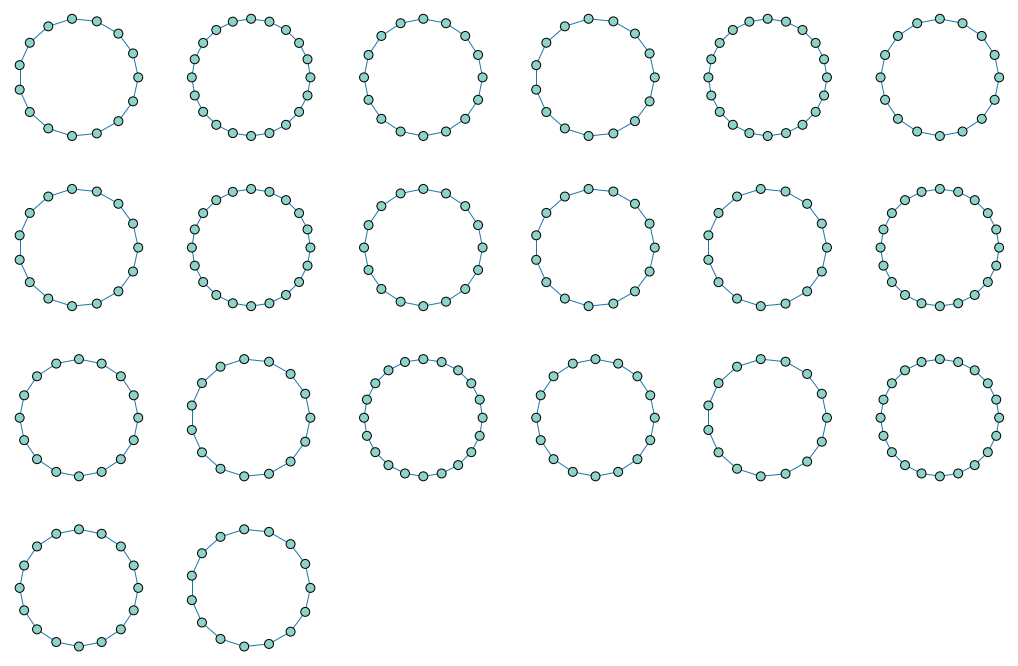

1
Iteration:1
[<networkx.classes.graph.Graph object at 0x000001D2198B1480>, <networkx.classes.graph.Graph object at 0x000001D21600A6E0>, <networkx.classes.graph.Graph object at 0x000001D211274580>, <networkx.classes.graph.Graph object at 0x000001D2110FFCD0>, <networkx.classes.graph.Graph object at 0x000001D2110FFD90>, <networkx.classes.graph.Graph object at 0x000001D2110FD9F0>, <networkx.classes.graph.Graph object at 0x000001D2110FE020>, <networkx.classes.graph.Graph object at 0x000001D2110FE7A0>, <networkx.classes.graph.Graph object at 0x000001D2110FCD90>, <networkx.classes.graph.Graph object at 0x000001D2160047F0>]


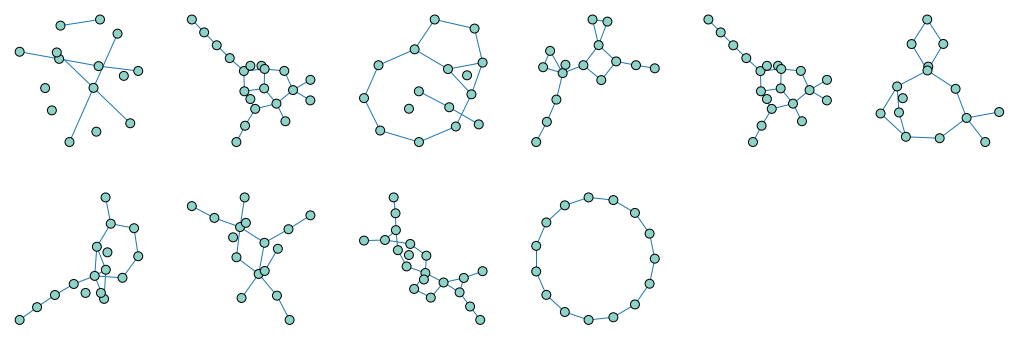

2
Iteration:2
[<networkx.classes.graph.Graph object at 0x000001D215FA1E70>, <networkx.classes.graph.Graph object at 0x000001D2190750C0>, <networkx.classes.graph.Graph object at 0x000001D216009E10>, <networkx.classes.graph.Graph object at 0x000001D215FA0910>, <networkx.classes.graph.Graph object at 0x000001D2199BE3B0>, <networkx.classes.graph.Graph object at 0x000001D2199BE980>, <networkx.classes.graph.Graph object at 0x000001D2199BD900>, <networkx.classes.graph.Graph object at 0x000001D2199BDA20>, <networkx.classes.graph.Graph object at 0x000001D2199BE770>, <networkx.classes.graph.Graph object at 0x000001D219A29120>]


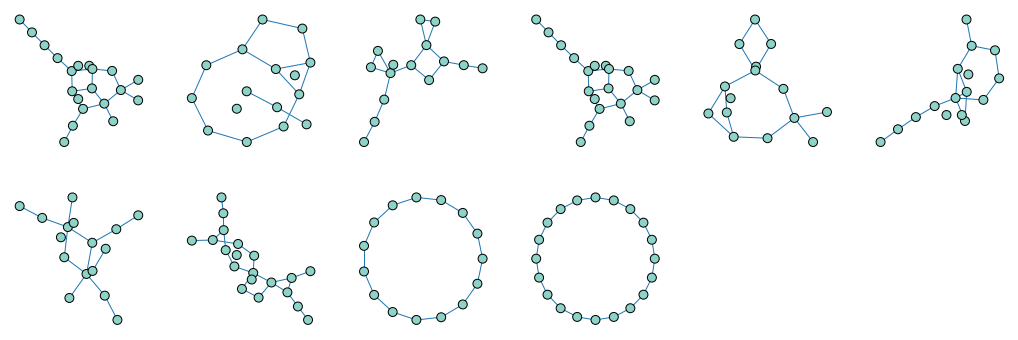

3
Iteration:3
[<networkx.classes.graph.Graph object at 0x000001D215FA0160>, <networkx.classes.graph.Graph object at 0x000001D219E29780>, <networkx.classes.graph.Graph object at 0x000001D215FA1B10>, <networkx.classes.graph.Graph object at 0x000001D215D668F0>, <networkx.classes.graph.Graph object at 0x000001D219E32AD0>, <networkx.classes.graph.Graph object at 0x000001D219E312A0>, <networkx.classes.graph.Graph object at 0x000001D219E31570>, <networkx.classes.graph.Graph object at 0x000001D219E31180>, <networkx.classes.graph.Graph object at 0x000001D2110FE7A0>, <networkx.classes.graph.Graph object at 0x000001D202862470>]


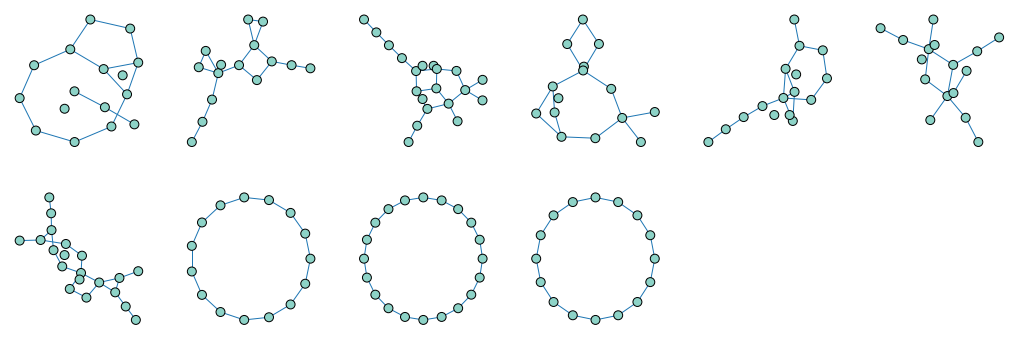

4
Iteration:4
[<networkx.classes.graph.Graph object at 0x000001D219E330D0>, <networkx.classes.graph.Graph object at 0x000001D211266110>, <networkx.classes.graph.Graph object at 0x000001D219E331F0>, <networkx.classes.graph.Graph object at 0x000001D202736CB0>, <networkx.classes.graph.Graph object at 0x000001D202736B00>, <networkx.classes.graph.Graph object at 0x000001D216C7ABF0>, <networkx.classes.graph.Graph object at 0x000001D219E26CB0>, <networkx.classes.graph.Graph object at 0x000001D209731840>, <networkx.classes.graph.Graph object at 0x000001D2199BD300>, <networkx.classes.graph.Graph object at 0x000001D218B08DC0>]


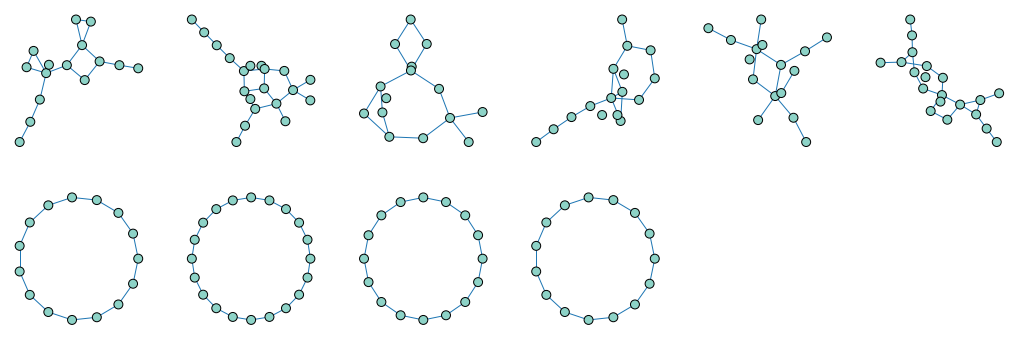

5
Iteration:5
[<networkx.classes.graph.Graph object at 0x000001D215FA18D0>, <networkx.classes.graph.Graph object at 0x000001D21418B6D0>, <networkx.classes.graph.Graph object at 0x000001D219A199F0>, <networkx.classes.graph.Graph object at 0x000001D215FA0400>, <networkx.classes.graph.Graph object at 0x000001D20ECD2980>, <networkx.classes.graph.Graph object at 0x000001D20ECD20B0>, <networkx.classes.graph.Graph object at 0x000001D20ECD1870>, <networkx.classes.graph.Graph object at 0x000001D20ECD2320>, <networkx.classes.graph.Graph object at 0x000001D20ECD1C60>, <networkx.classes.graph.Graph object at 0x000001D215BAE680>]


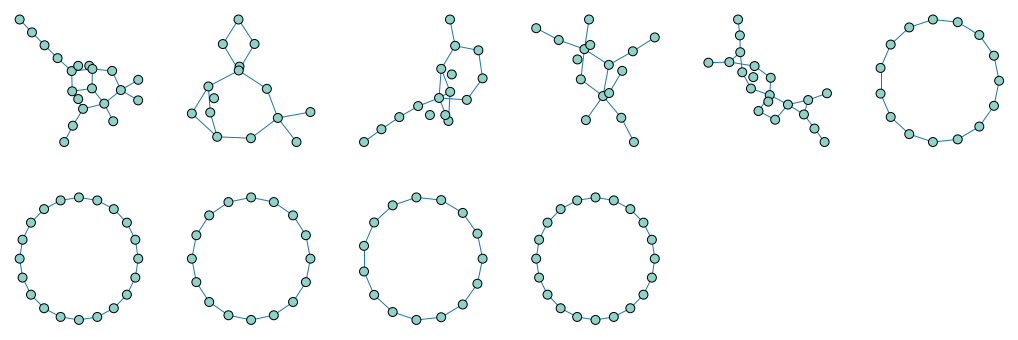

6
Iteration:6
[<networkx.classes.graph.Graph object at 0x000001D212613910>, <networkx.classes.graph.Graph object at 0x000001D219A1A7A0>, <networkx.classes.graph.Graph object at 0x000001D219A1A830>, <networkx.classes.graph.Graph object at 0x000001D211275BA0>, <networkx.classes.graph.Graph object at 0x000001D2112744F0>, <networkx.classes.graph.Graph object at 0x000001D211276020>, <networkx.classes.graph.Graph object at 0x000001D211277A30>, <networkx.classes.graph.Graph object at 0x000001D2112778B0>, <networkx.classes.graph.Graph object at 0x000001D211277DF0>, <networkx.classes.graph.Graph object at 0x000001D215FA0280>]


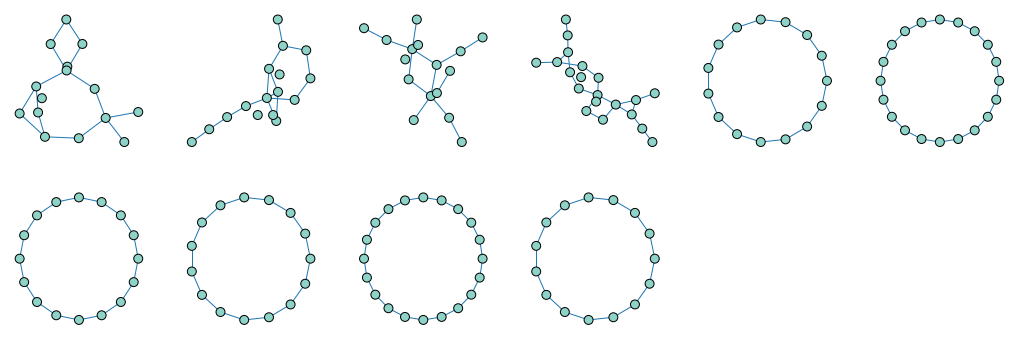

7
Iteration:7
[<networkx.classes.graph.Graph object at 0x000001D215FA11E0>, <networkx.classes.graph.Graph object at 0x000001D215FA1690>, <networkx.classes.graph.Graph object at 0x000001D20EA91F30>, <networkx.classes.graph.Graph object at 0x000001D20ECD1C60>, <networkx.classes.graph.Graph object at 0x000001D2026DC790>, <networkx.classes.graph.Graph object at 0x000001D2198B30A0>, <networkx.classes.graph.Graph object at 0x000001D216005CF0>, <networkx.classes.graph.Graph object at 0x000001D215FA1AB0>, <networkx.classes.graph.Graph object at 0x000001D216006170>, <networkx.classes.graph.Graph object at 0x000001D215FBCEB0>]


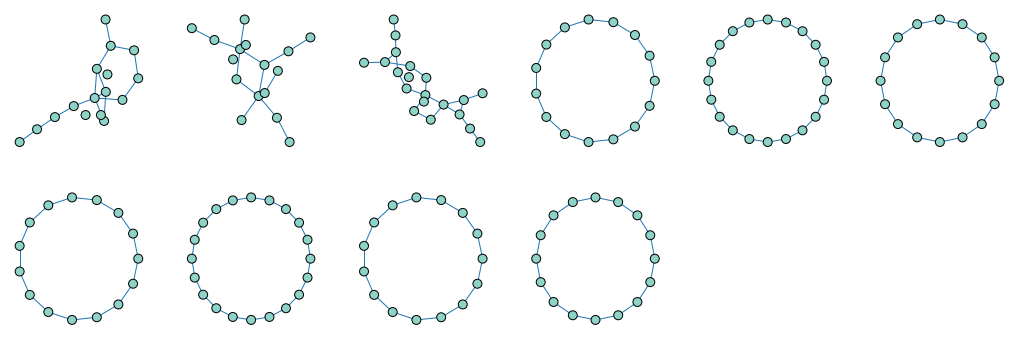

8
Iteration:8
[<networkx.classes.graph.Graph object at 0x000001D211275240>, <networkx.classes.graph.Graph object at 0x000001D2199864A0>, <networkx.classes.graph.Graph object at 0x000001D212613910>, <networkx.classes.graph.Graph object at 0x000001D215FCEEC0>, <networkx.classes.graph.Graph object at 0x000001D215FA23B0>, <networkx.classes.graph.Graph object at 0x000001D21960AD40>, <networkx.classes.graph.Graph object at 0x000001D21960B430>, <networkx.classes.graph.Graph object at 0x000001D2196087C0>, <networkx.classes.graph.Graph object at 0x000001D21963E650>, <networkx.classes.graph.Graph object at 0x000001D21963E710>]


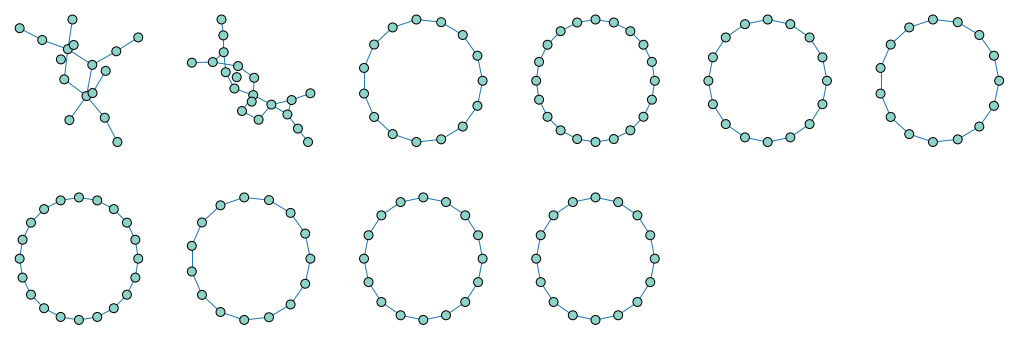

9
Iteration:9
[<networkx.classes.graph.Graph object at 0x000001D202849BA0>, <networkx.classes.graph.Graph object at 0x000001D219A1B310>, <networkx.classes.graph.Graph object at 0x000001D2028494B0>, <networkx.classes.graph.Graph object at 0x000001D21963F160>, <networkx.classes.graph.Graph object at 0x000001D219984E50>, <networkx.classes.graph.Graph object at 0x000001D21963EC50>, <networkx.classes.graph.Graph object at 0x000001D2112503D0>, <networkx.classes.graph.Graph object at 0x000001D215E8F790>, <networkx.classes.graph.Graph object at 0x000001D21963EAD0>, <networkx.classes.graph.Graph object at 0x000001D219BD79D0>]


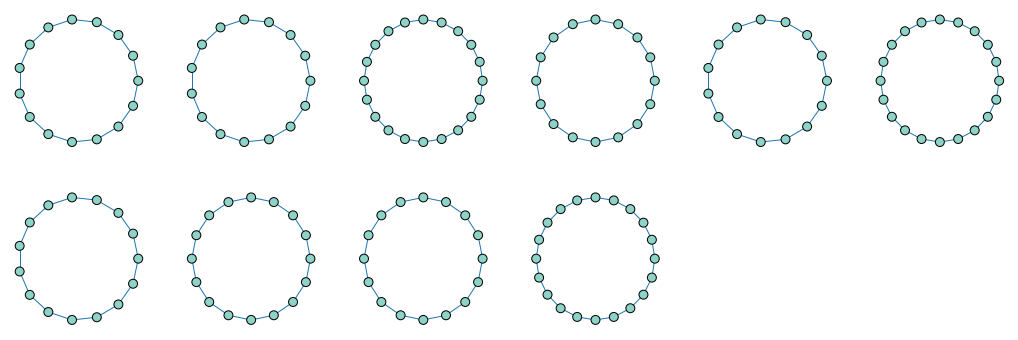

In [ ]:
import copy
r=[5, 10, 25, 33,40, 50, 66, 75,90, 100]
ref=reference_graphs4+reference_graphs4
ref2=[dgl.from_networkx(g) for g in ref]
r=np.arange(1, len(ref2)//2)
permuter=OverfittingPermuter(ref2)
draw_graphs( [i for i in ref ])
for  iter in r:
  #try:
    train_set, valid_set,permuted_graphs=permuter.permute_graphs(iter)
    print(f'Iteration:{iter}')
    permuted_set=[nx.Graph(dgl.to_networkx(i.cpu())) for i in permuted_graphs]
    print(permuted_set)
    draw_graphs( [nx.Graph(dgl.to_networkx(i)) for i in permuted_graphs ])
    plt.show()
  #except: break




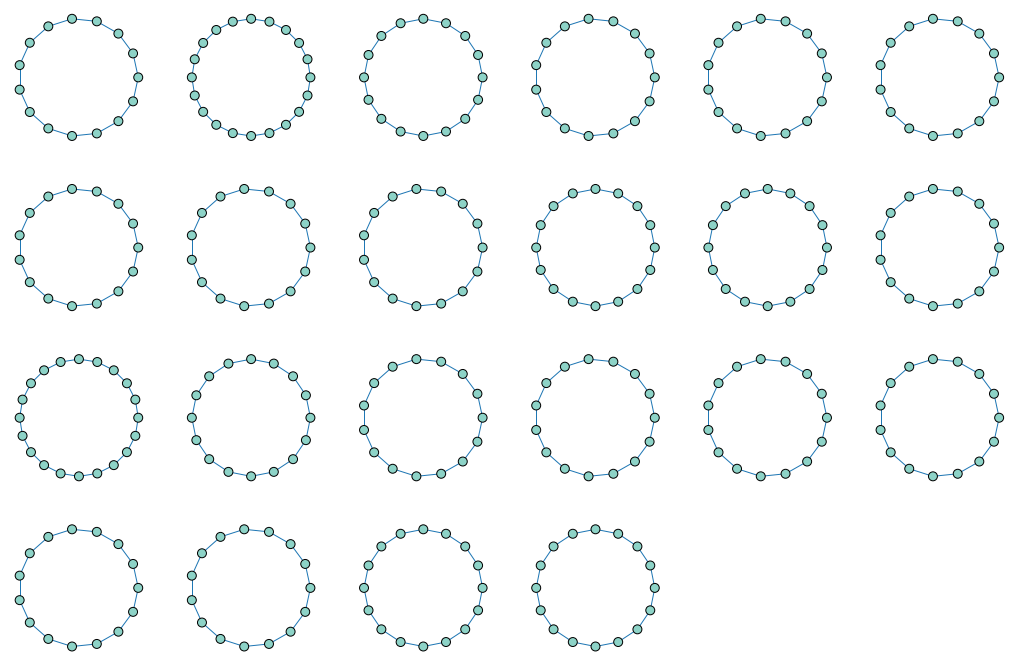

In [ ]:
draw_graphs(reference_graphs2)

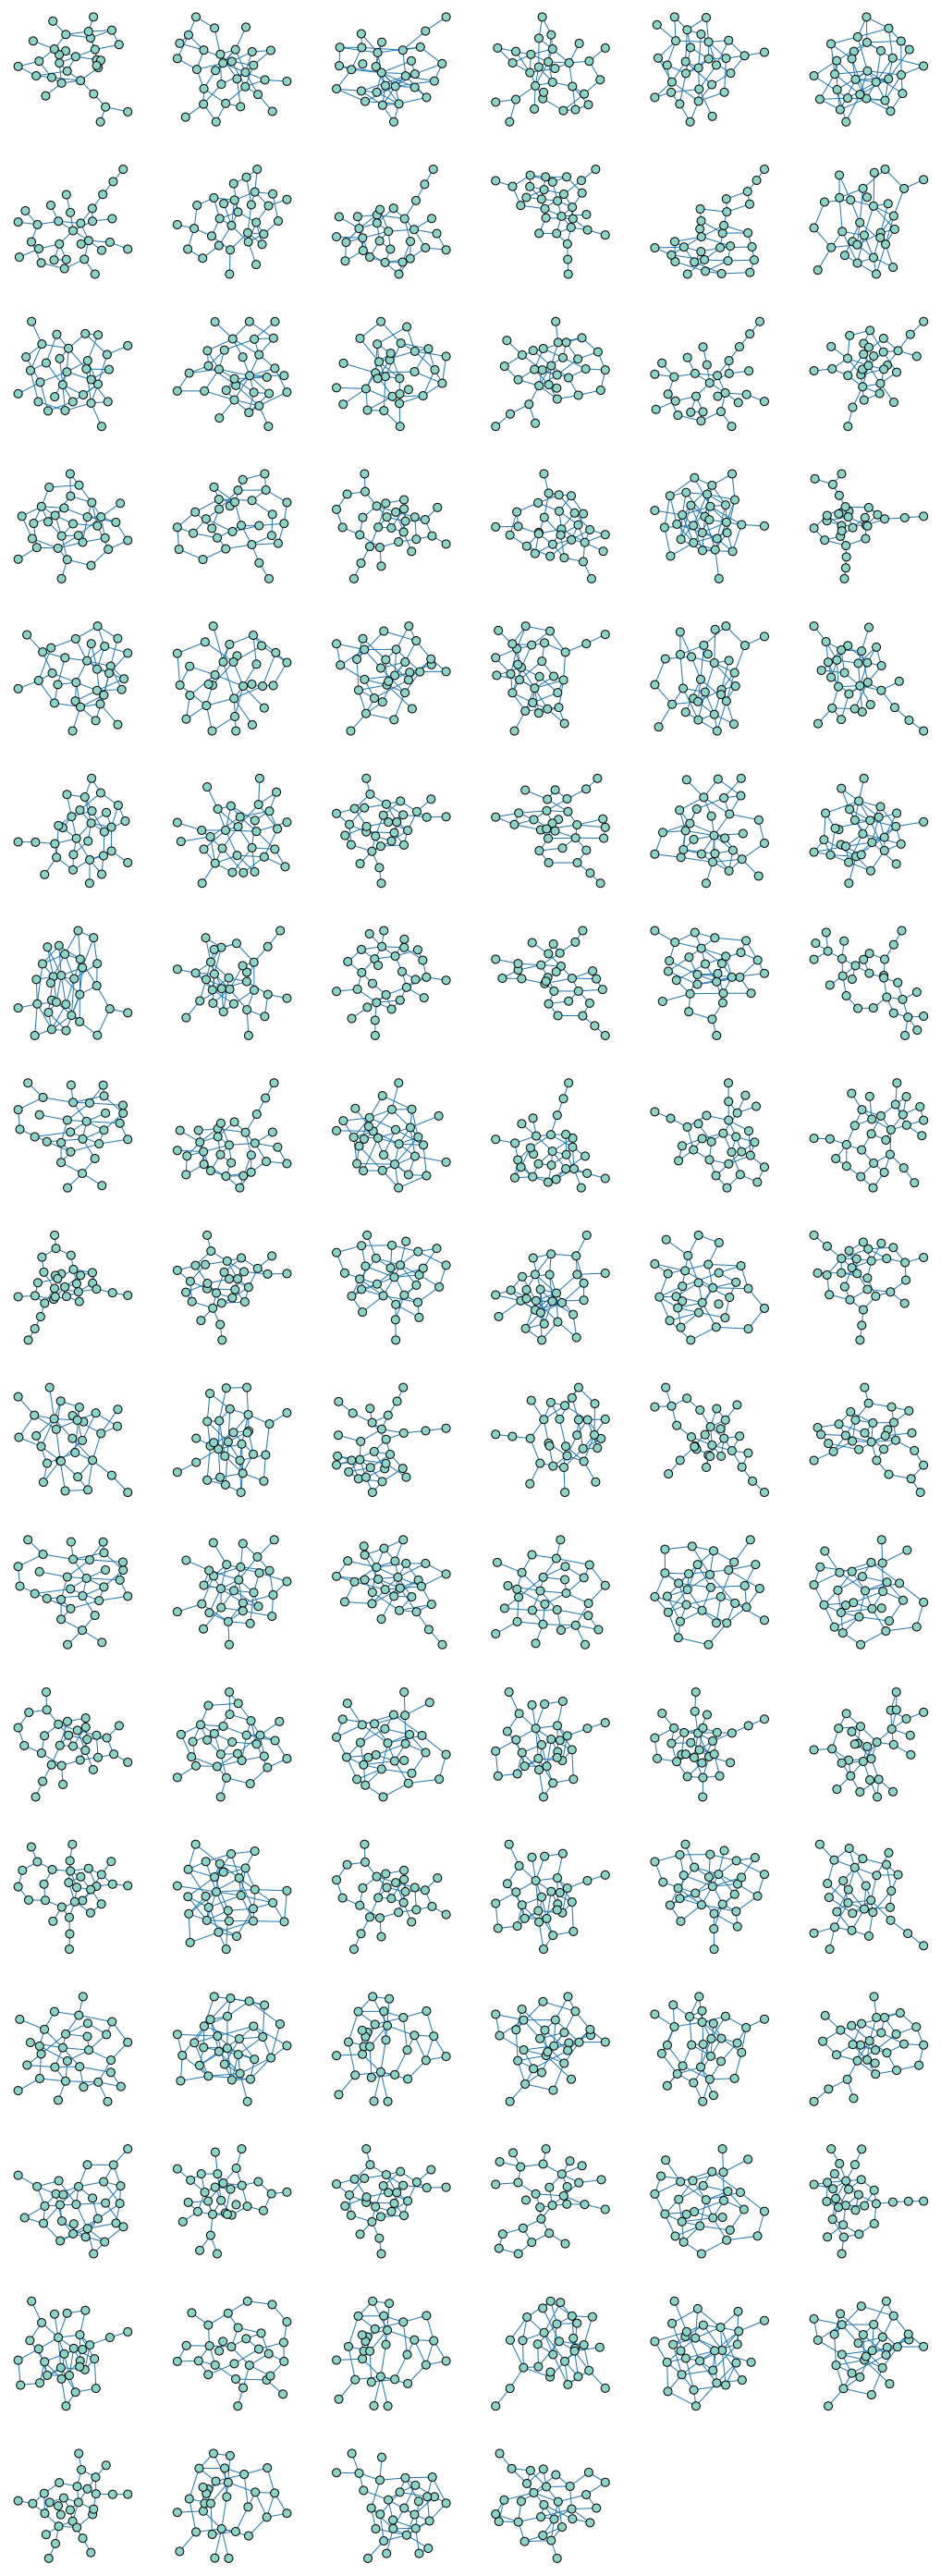

In [ ]:
draw_graphs( [nx.Graph(dgl.to_networkx(i)) for i in permuted_graphs ])